In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
# Assuming male and female are numpy matrices loaded from files
# For example:
male = pd.read_excel('/content/Adult Male BMX 2020.xlsx').to_numpy()
female = pd.read_excel('/content/Adult Female BMX 2020.xlsx').to_numpy()

In [24]:
# Sample data for demonstration
np.random.seed(0)
male = np.random.rand(100, 7) * 100
female = np.random.rand(100, 7) * 100

In [25]:
# 3. Draw histograms for female and male weights
female_weights = female[:, 0]
male_weights = male[:, 0]

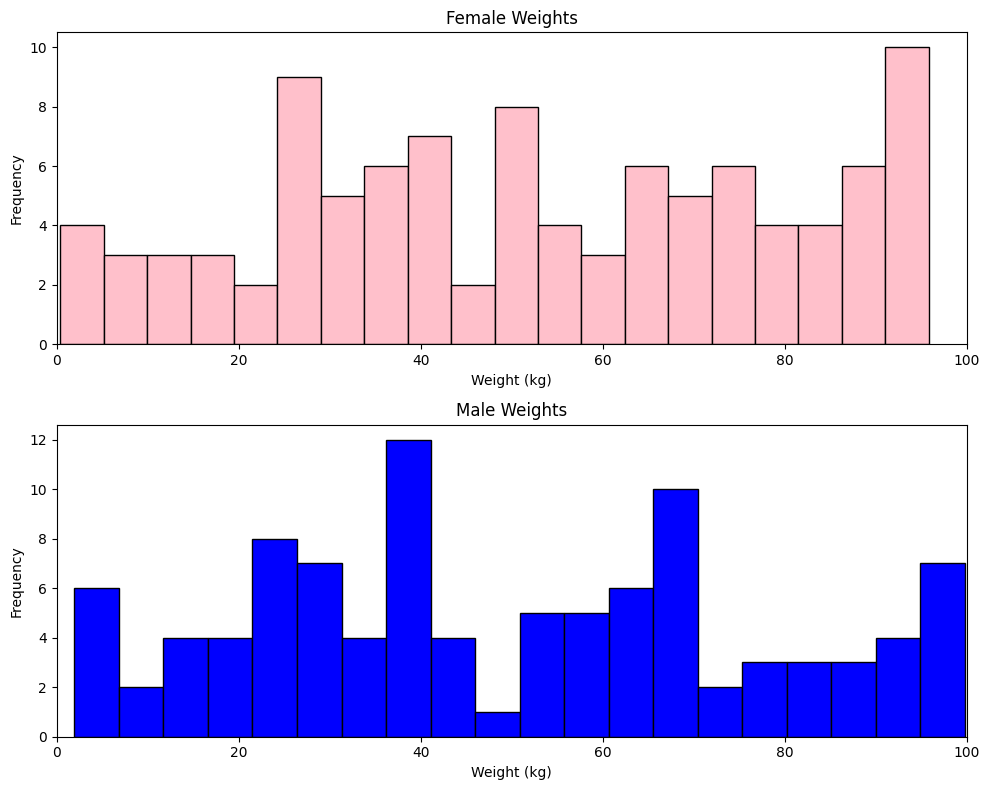

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.hist(female_weights, bins=20, color='pink', edgecolor='black')
ax1.set_title('Female Weights')
ax1.set_xlim([0, 100])
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Frequency')

ax2.hist(male_weights, bins=20, color='blue', edgecolor='black')
ax2.set_title('Male Weights')
ax2.set_xlim([0, 100])
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

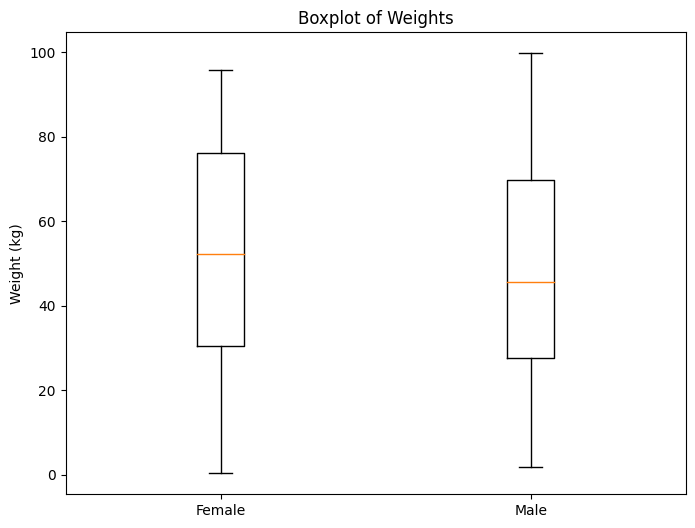

In [27]:
# 4. Draw a box-and-whisker plot for male and female weights
plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Boxplot of Weights')
plt.ylabel('Weight (kg)')
plt.show()

In [28]:
# 5. Compute basic numerical aggregates
def compute_aggregates(weights):
    return {
        'mean': np.mean(weights),
        'median': np.median(weights),
        'std_dev': np.std(weights),
        'variance': np.var(weights),
        'skewness': pd.Series(weights).skew(),
        'kurtosis': pd.Series(weights).kurt()
    }

female_aggregates = compute_aggregates(female_weights)
male_aggregates = compute_aggregates(male_weights)

print("Female Weights Aggregates:", female_aggregates)
print("Male Weights Aggregates:", male_aggregates)

Female Weights Aggregates: {'mean': 52.353930329406566, 'median': 52.294868471930606, 'std_dev': 27.296308740229936, 'variance': 745.0884708419533, 'skewness': -0.08677364259980605, 'kurtosis': -1.0963922315136958}
Male Weights Aggregates: {'mean': 49.573378166622945, 'median': 45.75987942957051, 'std_dev': 27.400704022711736, 'variance': 750.7985809402511, 'skewness': 0.17619890445646927, 'kurtosis': -1.0279342160464178}


In [29]:
# 6. Add BMI column to female matrix
female_bmi = female_weights / (female[:, 1] / 100) ** 2
female = np.column_stack((female, female_bmi))

In [30]:
# 7. Standardize the female dataset
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)

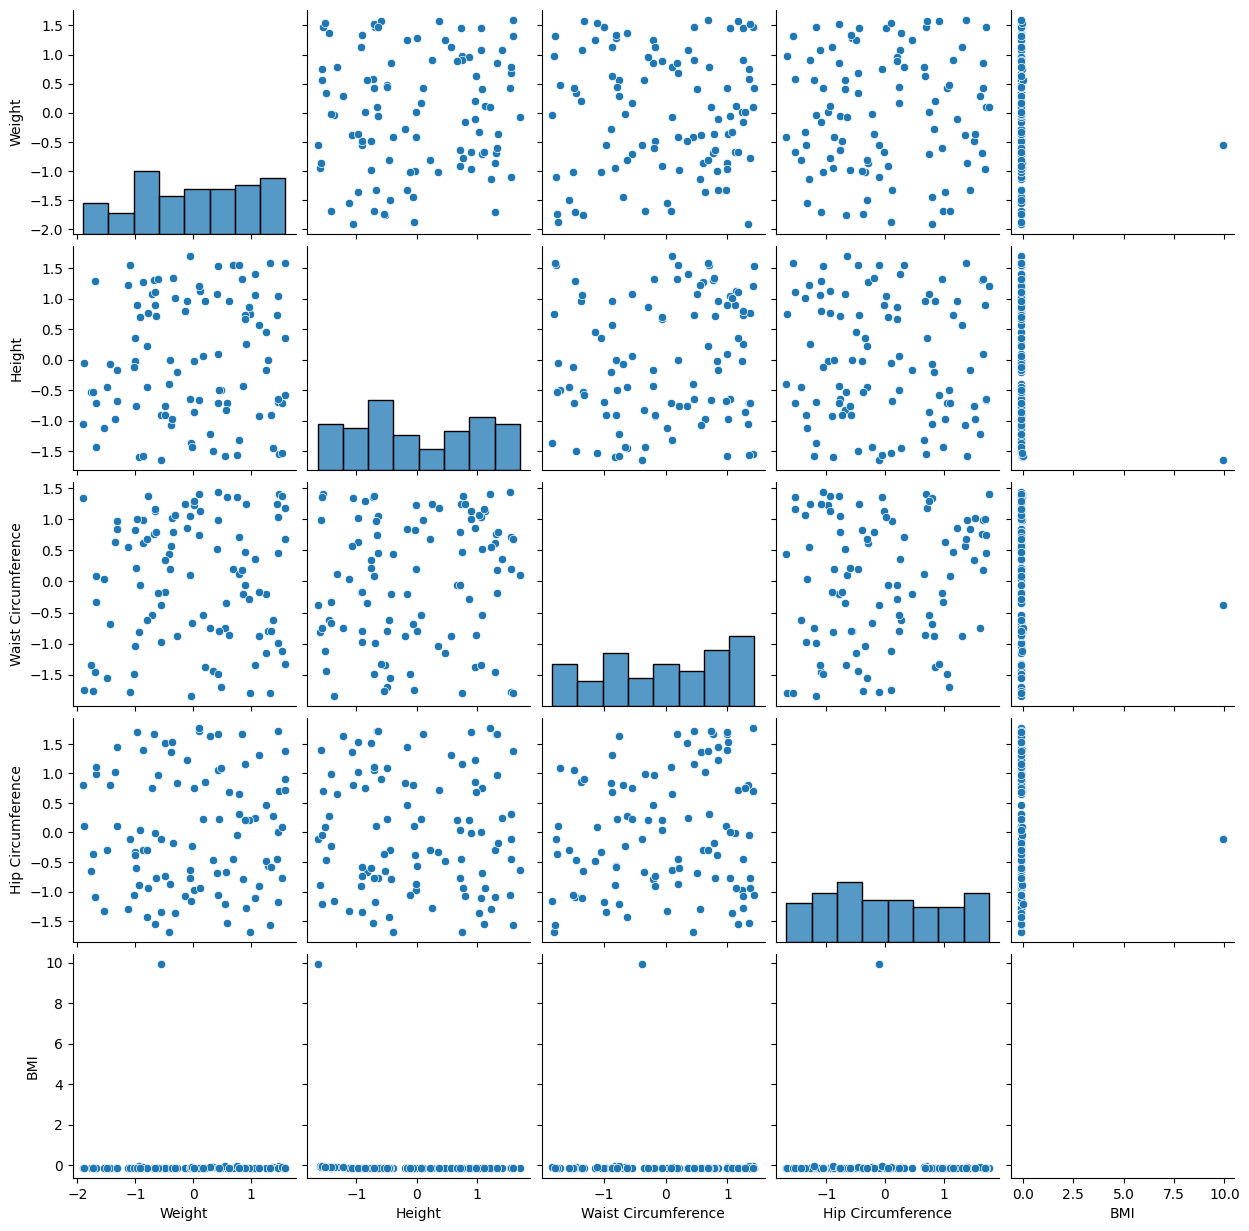

In [31]:
# 8. Draw a scatterplot matrix for standardized female data
df_zfemale = pd.DataFrame(zfemale, columns=['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI'])
sns.pairplot(df_zfemale[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.show()

In [32]:
# Compute Pearson's and Spearman's correlation coefficients
pearson_corr = df_zfemale.corr(method='pearson')
spearman_corr = df_zfemale.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)

Pearson Correlation:
                        Weight    Height  Upper Arm Length  Upper Leg Length  \
Weight               1.000000  0.067211          0.109348          0.076662   
Height               0.067211  1.000000          0.035336          0.159661   
Upper Arm Length     0.109348  0.035336          1.000000         -0.212184   
Upper Leg Length     0.076662  0.159661         -0.212184          1.000000   
Arm Circumference   -0.013127 -0.124729          0.174211         -0.046511   
Hip Circumference    0.019699 -0.048328          0.061642         -0.047058   
Waist Circumference  0.025838  0.150015         -0.006539          0.049678   
BMI                 -0.054246 -0.171295         -0.069437         -0.062280   

                     Arm Circumference  Hip Circumference  \
Weight                       -0.013127           0.019699   
Height                       -0.124729          -0.048328   
Upper Arm Length              0.174211           0.061642   
Upper Leg Length      

In [33]:
# 9. Compute waist-to-height and waist-to-hip ratios
male_ratios = np.column_stack((male[:, 6] / male[:, 1], male[:, 6] / male[:, 5]))
female_ratios = np.column_stack((female[:, 6] / female[:, 1], female[:, 6] / female[:, 5]))

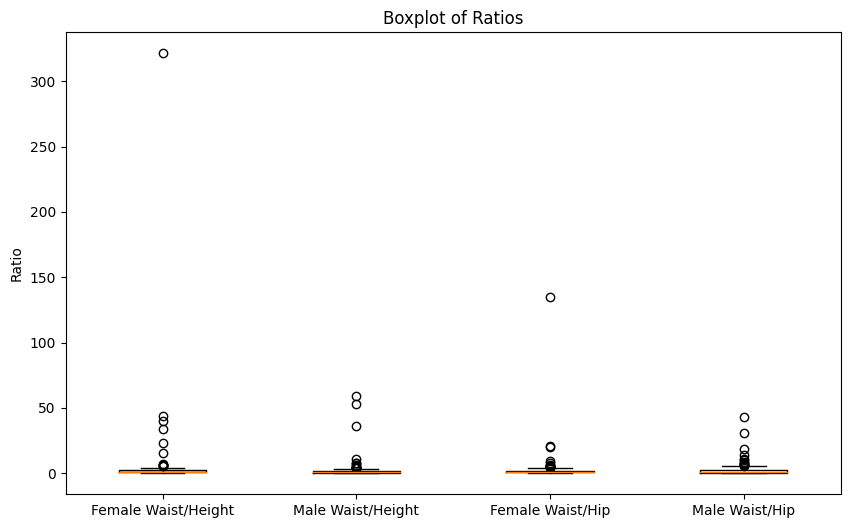

In [34]:
# 10. Draw box-and-whisker plots for the ratios
plt.figure(figsize=(10, 6))
plt.boxplot([female_ratios[:, 0], male_ratios[:, 0], female_ratios[:, 1], male_ratios[:, 1]], labels=['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip'])
plt.title('Boxplot of Ratios')
plt.ylabel('Ratio')
plt.show()

In [35]:
# 11. Discuss advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio
advantages_disadvantages = {
    'BMI': {
        'advantages': ['Easy to calculate', 'Widely used and understood'],
        'disadvantages': ['Does not account for muscle mass', 'May not accurately reflect body fat distribution']
    },
    'Waist-to-Height Ratio': {
        'advantages': ['Better indicator of abdominal fat', 'Simple to measure'],
        'disadvantages': ['May not be accurate for very tall or short individuals']
    },
    'Waist-to-Hip Ratio': {
        'advantages': ['Good indicator of fat distribution', 'Associated with health risks'],
        'disadvantages': ['Can be difficult to measure accurately', 'May not reflect overall body fat']
    }
}

print("Advantages and Disadvantages:\n", advantages_disadvantages)

Advantages and Disadvantages:
 {'BMI': {'advantages': ['Easy to calculate', 'Widely used and understood'], 'disadvantages': ['Does not account for muscle mass', 'May not accurately reflect body fat distribution']}, 'Waist-to-Height Ratio': {'advantages': ['Better indicator of abdominal fat', 'Simple to measure'], 'disadvantages': ['May not be accurate for very tall or short individuals']}, 'Waist-to-Hip Ratio': {'advantages': ['Good indicator of fat distribution', 'Associated with health risks'], 'disadvantages': ['Can be difficult to measure accurately', 'May not reflect overall body fat']}}


In [36]:
# 12. Print standardized body measurements for the 5 persons with the lowest and highest BMI
sorted_indices = np.argsort(zfemale[:, 7])
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

print("Lowest BMI Standardized Measurements:\n", zfemale[lowest_bmi_indices])
print("Highest BMI Standardized Measurements:\n", zfemale[highest_bmi_indices])

Lowest BMI Standardized Measurements:
 [[-1.88111738 -0.05204353  0.82623168 -1.50682409  1.23077899  0.11122306
  -1.73683521 -0.10464416]
 [-1.70043547  1.28896219  1.51575227 -1.2578744  -0.63448788 -1.08764696
  -1.45648719 -0.10464246]
 [-1.90384332 -1.04806613  0.51100251 -1.3845666   1.23890681  0.80520196
   1.34080066 -0.1046402 ]
 [-1.09584667  1.54915055  0.4105964  -1.29922485 -0.79508951 -0.10919955
  -1.76877486 -0.1046337 ]
 [-1.12887461  1.2296886   1.13560794 -1.13028157  0.29374578 -1.29531399
   0.55636223 -0.10463134]]
Highest BMI Standardized Measurements:
 [[ 1.47885382 -1.54944269  1.44062881 -0.3671236   1.22684692  0.70491494
   1.40973463 -0.0474277 ]
 [ 0.74736957 -1.56512407 -0.08968766  0.48147513  1.14085874 -0.04443674
   1.35006223 -0.0407678 ]
 [-0.94484114 -1.60119244  0.08661336 -0.81325323  1.03980673 -0.88801251
  -0.81601288 -0.02934786]
 [ 0.5553374  -1.57488847 -1.16714271 -0.69534602  1.58487018 -1.21155219
  -0.75034065 -0.02809227]
 [-0.555461